#                              Code of Assignment 1: ME-686A

* Name:         ***Prashant Anand Ranjan***
* Roll no.:      ***21105066***


_________________________________Temperature_high: 800__________________________________________
Thermal storage capacity, Q:		 7831200.0
-------------------------------------------------------------------
Cycle time, t_cycle/hr:			 1.3374485596707817
-------------------------------------------------------------------
The thermal storage/release time, t/hr:
 [20.62982697 17.85940037 15.7539485  14.09972987 12.76574162 11.6672172
 10.74688193  9.96464351  9.29159822  8.70638241  8.19286436  7.73863507
  7.33399294  6.9712436   6.64420634  6.34785933  6.07808016  5.83145313
  5.60512402  5.3966893 ]
-------------------------------------------------------------------
Exergy destruction rate, ηgen/%:
 [1.48766554 1.71843859 1.948101   2.1766575  2.4041128  2.63047154
 2.85573834 3.07991778 3.30301441 3.52503271 3.74597716 3.96585218
 4.18466216 4.40241146 4.6191044  4.83474526 5.04933827 5.26288767
 5.47539763 5.68687228]
-------------------------------------------------------------------


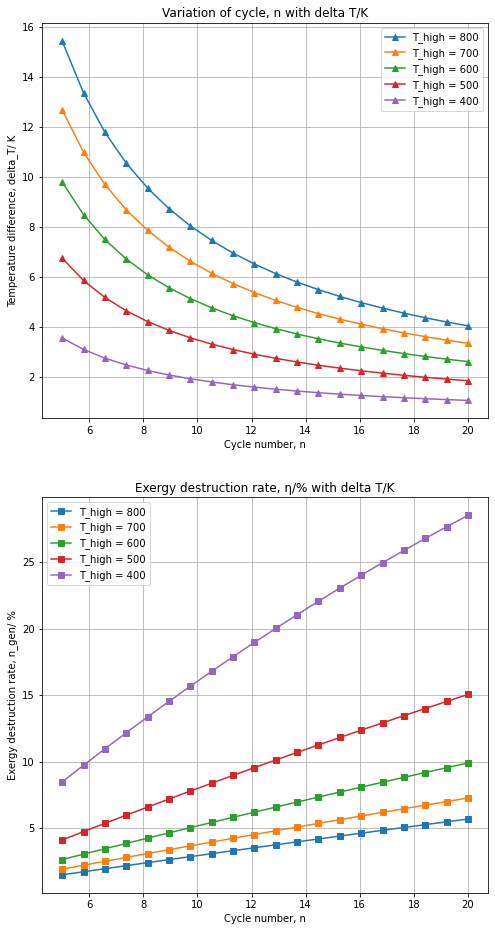

In [3]:
#.....Importing libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#.....Declaring variables
n = 20                                                              # Number of points to be plotted
Thigh = np.array([800, 700, 600, 500, 400])
T_low = 298
T0 = T_low
dT = np.linspace(5, 20, n)
n = np.empty(n)
η = n.copy()

#.....Properties of the working materials
cp_sto = 0.78                                                       # The heat capacity of pebble
cp_air = 1.08                                                       # The heat capacity of air

m_air = 3                                                           # The mass flow rate of the cold and hot air
m_sto = 60e3 / 3                                                    # The total mass of pebbles from point B to point F

#.....Main Code
plt.figure(figsize = (8, 16))
for T_high in Thigh:

    T_mid = (T_high + T_low) / 2 
    delta_T = T_high - T_low
    
    Q = cp_sto * m_sto * delta_T                                     # The constant thermal storage capacity during several cycles
    
    M_air = Q / (cp_air * delta_T)                                   # The mass of air flowed through the PBTES 
    
    t_cycle = M_air / m_air                                          # Cycle time in seconds

    delta_s_high = cp_air * m_air * np.log((T_low + dT) / T_high)    # The entropy change of hot air per unit of time
    delta_s_low = cp_air * m_air * np.log((T_high - dT) / T_low)     # The entropy change of cold air per unit of time

    I_trasfer = T0 * (delta_s_high + delta_s_low)                    # The exergy destruction per unit of time

    η = (I_trasfer * t_cycle) / (cp_sto * m_sto * 
                                 (delta_T - T0 * np.log(T_high / T_low))) # Exergy destruction rate, ηgen,

    delta_s1 = cp_sto * m_sto * ((T_mid / (T_high - T_mid)) * np.log(T_high / T_mid) - 1) # The change of entropy in zone 1 
    delta_s2 = cp_sto * m_sto * ((T_mid / (T_mid - T_low)) * np.log(T_mid / T_low) - 1)   # The change of entropy in zone 2

    I_sto = T0 * (delta_s1 + delta_s2)                                # The total exergy destruction in one cycle

    t = I_sto / I_trasfer                                             # The thermal storage/release time of the stable 
                                                                      # operation of the PBTES

    n = t / t_cycle                                                   # The cycle number of operation

    Label = "T_high = {}".format(T_high)
    
    #.....Generating the plots for Variation of cycle with delta T
    #     under different T_high
    plt.subplot(2, 1, 1)
    plt.plot(dT, n, marker = '^', label=Label)
    plt.title('Variation of cycle, n with delta T/K')
    plt.xlabel('Cycle number, n')
    plt.ylabel('Temperature difference, delta_T/ K')
    plt.grid()
    plt.legend()
    
    #.....Generating the plots for Exergy destruction rate with delta T
    #     under different T_high
    plt.subplot(2, 1, 2)
    plt.plot(dT, η * 100, marker = 's', label=Label)
    plt.title('Exergy destruction rate, η/% with delta T/K')
    plt.xlabel('Cycle number, n')
    plt.ylabel('Exergy destruction rate, n_gen/ %')
    plt.grid()
    plt.legend() 
    print('_________________________________Temperature_high: {}__________________________________________'.format(T_high))
    print('Thermal storage capacity, Q:\t\t', Q)
    print('-------------------------------------------------------------------')
    print('Cycle time, t_cycle/hr:\t\t\t', t_cycle/3600)
    print('-------------------------------------------------------------------')
    print('The thermal storage/release time, t/hr:\n',t/3600)
    print('-------------------------------------------------------------------')
    print('Exergy destruction rate, ηgen/%:\n',η * 100)
    print('-------------------------------------------------------------------')
    print('The cycle number of operation, n:\n',n)